# EDA

### Exploratory Data Analysis - Data Cleaning and Initial Observations

##### Imports and Reading in Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#https://stackoverflow.com/questions/66109829/pandas-df-isna-sum-not-showing-all-column-names
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

ames_test = pd.read_csv('../02_DATA/test.csv')
ames_train = pd.read_csv('../02_DATA/train.csv')

In [3]:
ames_test.head(50)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,294,Unf,0,252,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,286,TA,TA,Y,0,0,64,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1958,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,869,869,GasA,TA,Y,SBrkr,1093,0,0,1093,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1959.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,840,0,1680,0,0,2,1,2,1,Gd,3,Typ,0,NaN,Attchd,2004.0,RFn,2,588,TA,TA,Y,0,111,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,N

In [29]:
#ames_train.info()

# Data Inspection
The datasets have 82 columns in common, 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables. My first step in cleaning the data was to look at the columns with missing values. I compared these columns with their descriptions in the data description in Kaggle to decide what to do with them. The number next to each column name is the total number of missing values in that column. The number in parentheses is the number of possible values (if nominal or ordinal), so that I could easily reference if it was feasible to later encode without OHE (for example, if a column contained only two values you could simply replace the values with 1 and 0 ; or if the ordinal values indicated a directional relationship you could reassign strings with 1, 2, 3, 4 in some cirsumstances). In many cases, it seemed that the presence of a Null most likely indicated the feature did not exist, and so many columns were imputed with the NA/None equivalent for that column.

## Nominal 

    PID                   0
    MS SubClass           0 (16 possible values)
    MS Zoning             0 (8 possible values)
    *Street                0 (2 possible values) **convert to num
    *Alley              1911 (3 possible values --> Grvl - Gravel, Pave - Paved, NA - No alley access) **convert to num
    Land Contour          0 (4 possible values) 
    Lot Config            0 (5 possible values)
    Neighborhood          0 (28 possible values)
    Condition 1           0 (9 possible values)
    Condition 2           0 (9 possible values)
    Bldg Type             0 (5 possible values)
    House Style           0 (8 possible values)
    Roof Style            0 (
    Roof Matl             0
    Exterior 1st          0
    Exterior 2nd          0
    Mas Vnr Type         22 (5 possible values - impute NaN with None)
    Foundation            0
    Heating               0
    *Central Air           0
    Garage Type         113 (7 possible values - impute NaN with NA - No Garage)
    Misc Feature       1986 (Impute NaN/Null with NA - None
    Sale Type             0
 
# Ordinal 
    *Lot Shape             0 *
    *Utilities             0 (4 possible values) **convert to num
    *Land Slope            0 (3 possible values --> low/high: Gtl - Gentle (1), Mod - Moderate (2), Sev - Severe (3)
    Overall Qual          0 (10 possible values, directional low/high)
    Overall Cond          0 (10 possible values, directional low/high)  
    *Exter Qual            0
    *Exter Cond            0
    *Bsmt Qual            55 (Impute Missing with NA)
    *Bsmt Cond            55 (Impute Missing with NA)
    Bsmt Exposure        58 (Impute Missing with NA)
    BsmtFin Type 1       55 (Impute Missing with NA)   
    BsmtFin Type 2       56 (Impute Missing with NA)   
    *Heating QC            0    
    Electrical            0    
    *Kitchen Qual          0
    *Functional            0
    *Fireplace Qu       1000 (Impute Missing with NA)   
    *Garage Finish       114 (Impute Missing with NA)   
    *Garage Qual         114 (Impute Missing with NA)   
    *Garage Cond         114 (Impute Missing with NA)   
    Paved Drive           0    
    *Pool QC            2042 (Impute Missing with NA)   
    *Fence              1651 (Impute Missing with NA)      
    
# Discrete     
    Year Built            0
    Year Remod/Add        0    
    Bsmt Full Bath        2 (Impute Missing with 0)
    Bsmt Half Bath        2 (Impute Missing with 0)
    Full Bath             0
    Half Bath             0
    Bedroom AbvGr         0
    Kitchen AbvGr         0 
    TotRms AbvGrd         0
    Fireplaces            0    
    Garage Yr Blt       114 (Impute w/Min Value, since these likely don't have garages --> error, one says 2207) 
    Garage Cars           1 (Impute Missing with 0)
    Mo Sold               0
    Yr Sold               0    
    
    
# Continuous
    Lot Frontage        330 (Impute Missing with 0)
    Lot Area              0
    Mas Vnr Area         22 (Impute Missing with 0)
    BsmtFin SF 1          1 (Impute Missing with 0)
    BsmtFin SF 2          1 (Impute Missing with 0)
    Bsmt Unf SF           1 (Impute Missing with 0)
    Total Bsmt SF         1 (Impute Missing with 0)
    1st Flr SF            0
    2nd Flr SF            0
    Low Qual Fin SF       0
    Gr Liv Area           0    
    Garage Area           1 (Impute Missing with 0)
    Wood Deck SF          0
    Open Porch SF         0
    Enclosed Porch        0
    3Ssn Porch            0
    Screen Porch          0
    Pool Area             0    
    Misc Val              0
    SalePrice             0    
    
    
---




# Data Cleaning
Applying the above changes to missing data in both the test and the training data sets. 

In [10]:
# write a function to do this quicker
def clean_data(df):
    na_cols = ['Alley', 'Garage Type', 'Mas Vnr Type', 'Misc Feature', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']
    zero_cols = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']
    
    #cleaning, replace nan w/ 'NA'
    for col in na_cols:
        df[col].replace(np.nan, 'NA', inplace=True)
        
    #cleaning, replace nan w/ zero val
    for col in zero_cols:
        df[col].replace(np.nan, 0, inplace=True)
        
    #impute w/median: Lot Frontage
    df['Lot Frontage'].replace(np.nan, df['Lot Frontage'].median(), inplace=True)
    #impute w/min 
    df['Garage Yr Blt'].replace(np.nan, df['Garage Yr Blt'].min(), inplace=True)
    
    return df

In [13]:
ames_train = clean_data(ames_train)
ames_test = clean_data(ames_test)

In [17]:
## FIX MISC VALUES AFTER BASIC CLEANING

#ames_test.isna().sum() # electrical missing 1 value -
#ames_test['Electrical'].value_counts() # --> SBrkr is most common value
# fill with SBrkr
ames_test['Electrical'].fillna('SBrkr', inplace=True)

#ames_train['Garage Yr Blt'].sort_values(ascending=False) # row 1699 probably meant 2007, not 2207
ames_train.loc[1699, 'Garage Yr Blt'] = 2007

In [20]:
#ames_train['Garage Yr Blt'].sort_values(ascending=False) #fixed it! 
#ames_test['Garage Yr Blt'].sort_values(ascending=False) #test set doesn't seem to have the same problem

## Feature Engineering

I've opted to create some of my own features to see the interaction between variables, and in some cases have chosen to convert Nominal/Ordinal columns to numeric values for easier correlations

In [26]:
# feature engineering function to keep things clean
def engineer_feats(df):
    # converting values in test set
    # ordinal
    # Lot Shape, Utilities, Land Slope, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Kitchen Qual, Functional, Fireplace Qu, Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Heating QC
    df['Lot Shape'].replace({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4 }, inplace=True)
    df['Utilities'].replace({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3 }, inplace=True)
    df['Land Slope'].replace({'Gtl': 0, 'Mod': 1, 'Sev': 2 }, inplace=True)
    df['Exter Qual'].replace({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }, inplace=True)
    df['Exter Cond'].replace({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }, inplace=True)
    df['Bsmt Qual'].replace({ 'NA': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, inplace=True)
    df['Bsmt Cond'].replace({ 'NA': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, inplace=True)
    df['Kitchen Qual'].replace({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }, inplace=True)
    df['Functional'].replace({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7 }, inplace=True)
    df['Fireplace Qu'].replace({ 'NA': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, inplace=True)
    df['Garage Finish'].replace({'Po': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, inplace=True)
    df['Garage Qual'].replace({ 'NA': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, inplace=True)
    df['Garage Cond'].replace({ 'NA': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, inplace=True)
    df['Garage Cond'].replace({ 'NA': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, inplace=True)
    df['Pool QC'].replace({'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4 }, inplace=True)
    df['Fence'].replace({'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4 }, inplace=True)
    df['Heating QC'].replace({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, inplace=True)


    # Nominal
    # Street, Central Air
    df['Street'].replace({'Grvl': 0, 'Pave': 1 }, inplace=True)
    df['Central Air'].replace({'N': 0, 'Y': 1 }, inplace=True)

    #Engineered Features

    # House Age
    df['House_Age'] = df['Yr Sold'] - df['Year Built']
    df['Remodel_Age'] = df['Yr Sold'] - df['Year Remod/Add']
    
    return df

    

In [27]:
# run function on train and test sets
ames_train = engineer_feats(ames_train)
ames_test = engineer_feats(ames_test)

In [30]:
# write both out to CSV
ames_test.to_csv('../02_DATA/ames_test_clean.csv', index=False)
ames_train.to_csv('../02_DATA/ames_train_clean.csv', index=False)

# Exploratory Analysis & Visualization

Using pandas and Seaborn plots to look at data and identify potential attributes of interest to include in later modeling.

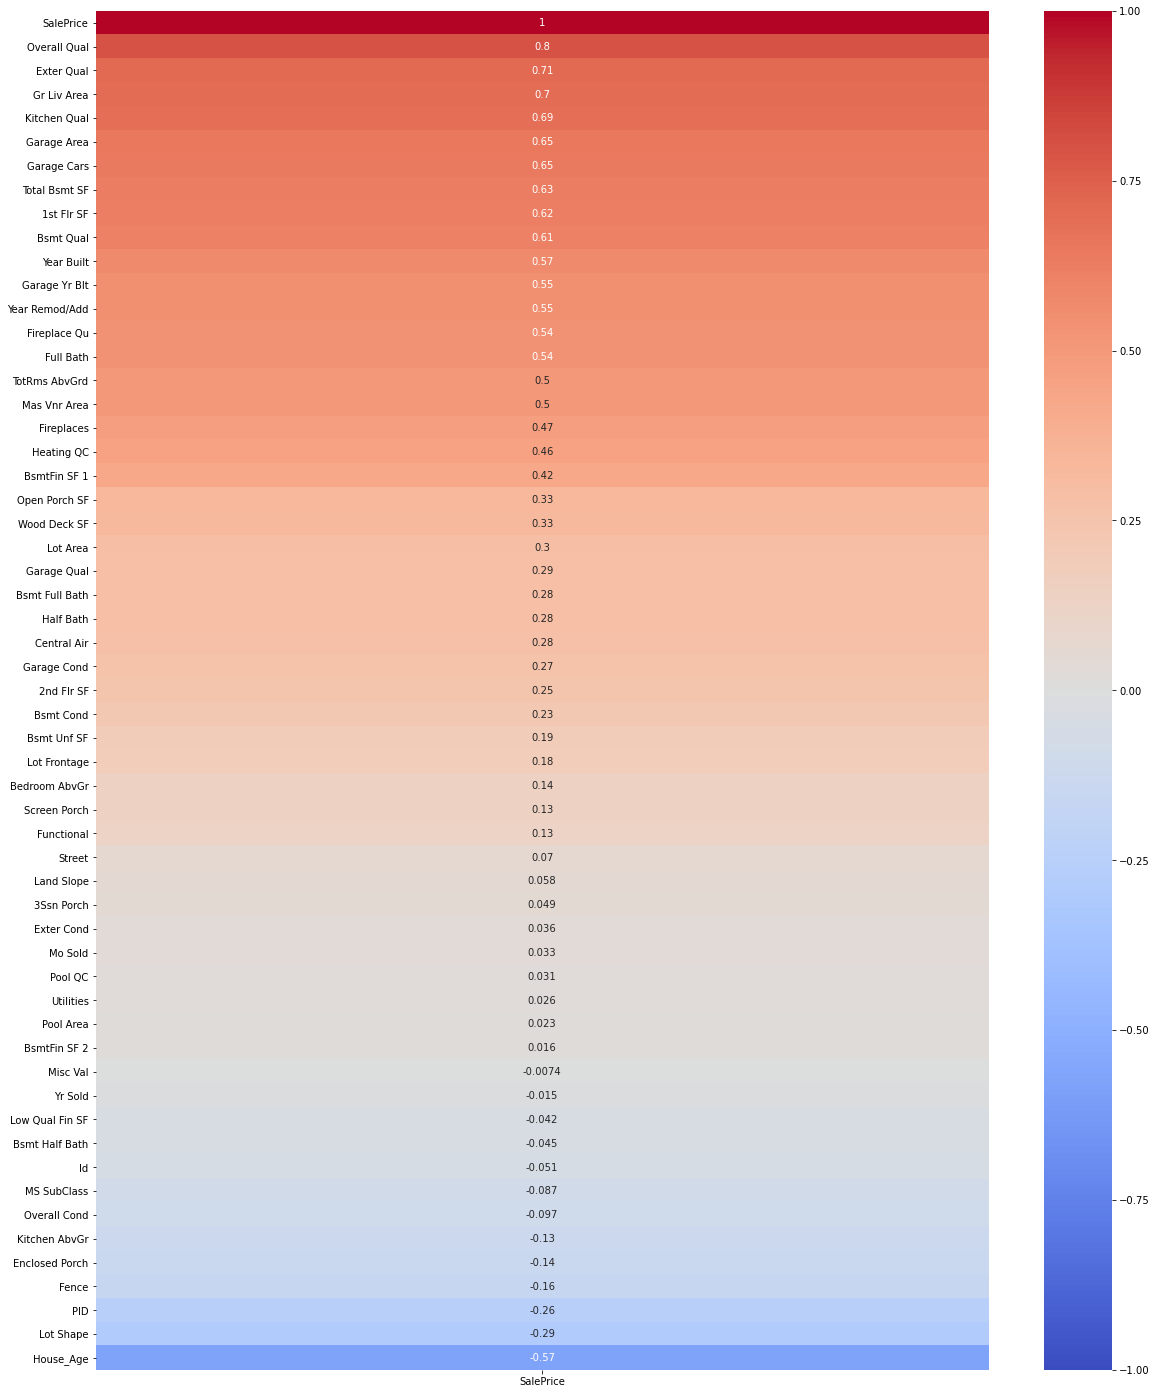

In [21]:
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
plt.figure(figsize=(20, 25))
sns.heatmap(ames_train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

***SalePrice Correlations:*** using Seaborn's Heatmap to visualize the relationships between variables, a few stand out. ***Overall Qual***, ***Exter Qual***, ***Gr Liv Area***, and ***Kitchen Qual*** are all heavily (positively) correlated with high sales values. The strongest Negative correlations were ***House_Age***, and ***Lot Shape*** (with a lower SalePrice correlated with an increasingly 'regularly' shaped lot). 

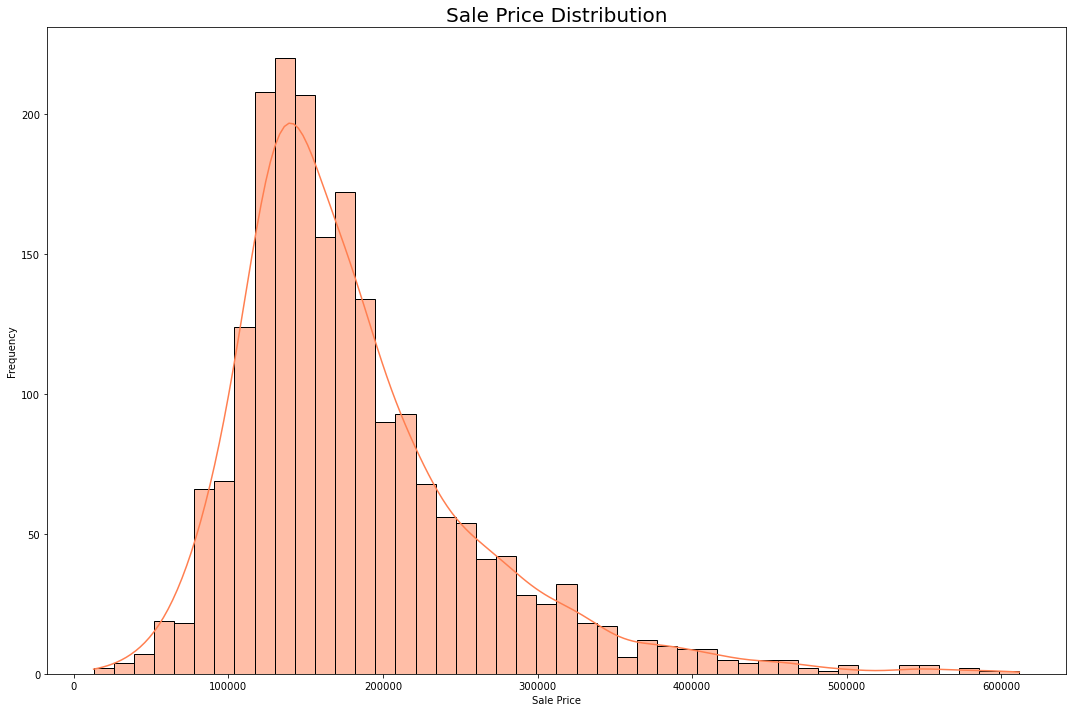

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Sale Price Distribution', fontdict={'fontsize': 20})
ax.set_xlabel('Sale Price')
ax.set_ylabel('Frequency')
sns.histplot(ames_train['SalePrice'], color='coral', kde=True)
plt.tight_layout();

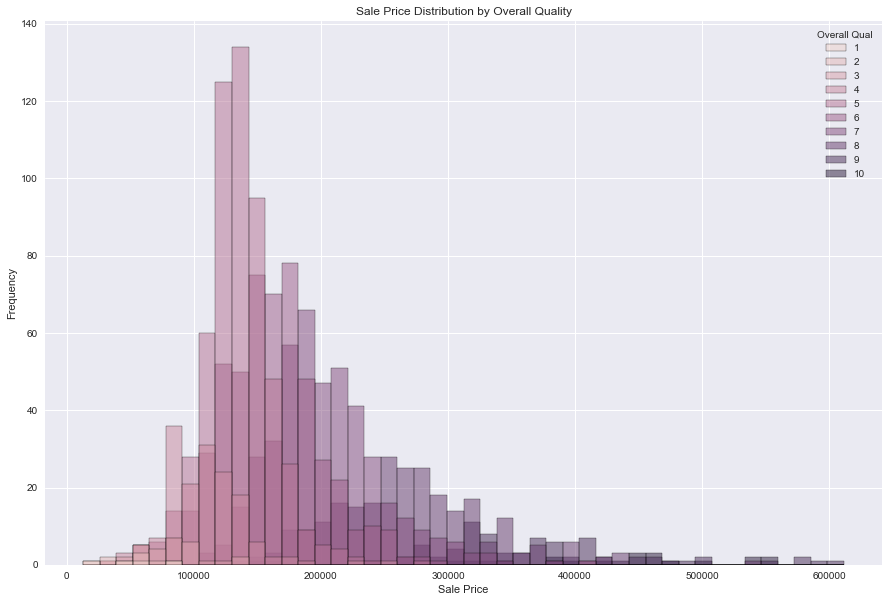

In [28]:
#plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
plt.title('Sale Price Distribution by Overall Quality')
plt.ylabel('Frequency')
plt.xlabel('Sale Price')
sns.histplot(data=ames_train, x='SalePrice', hue='Overall Qual');

***Sale Price Distribution:*** You can clearly see that the sales prices are not normally distributed and demonstrate right skewness. This indicates something other than randomness or chance is affecting sale price. Further investigation is merited. 

Because the data are not normally distributed, a log transformation of the target (SalePrice) might be considered.

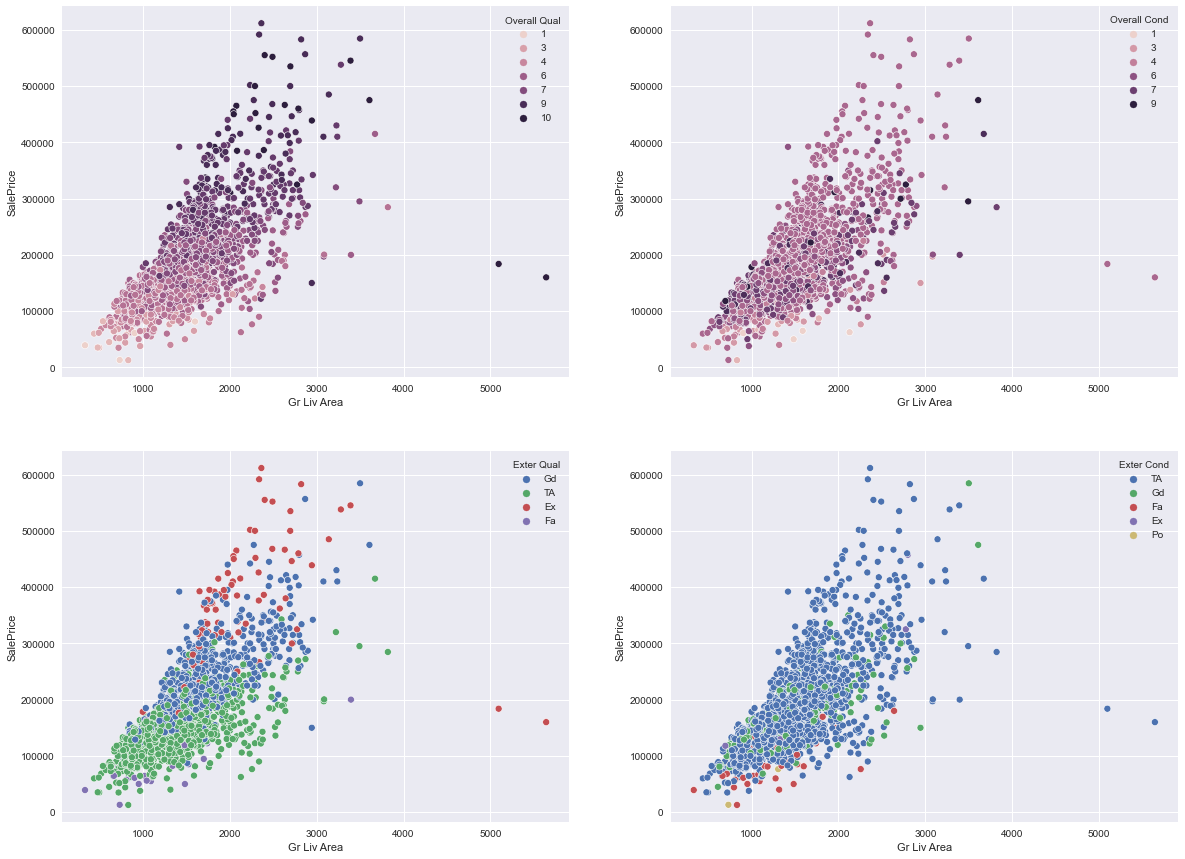

In [30]:
# a bunch of scatterplots to look at the data from different ways 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', ax=ax[0][0])
sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Overall Cond', ax=ax[0][1])
sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Exter Qual', ax=ax[1][0])
sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Exter Cond', ax=ax[1][1]);


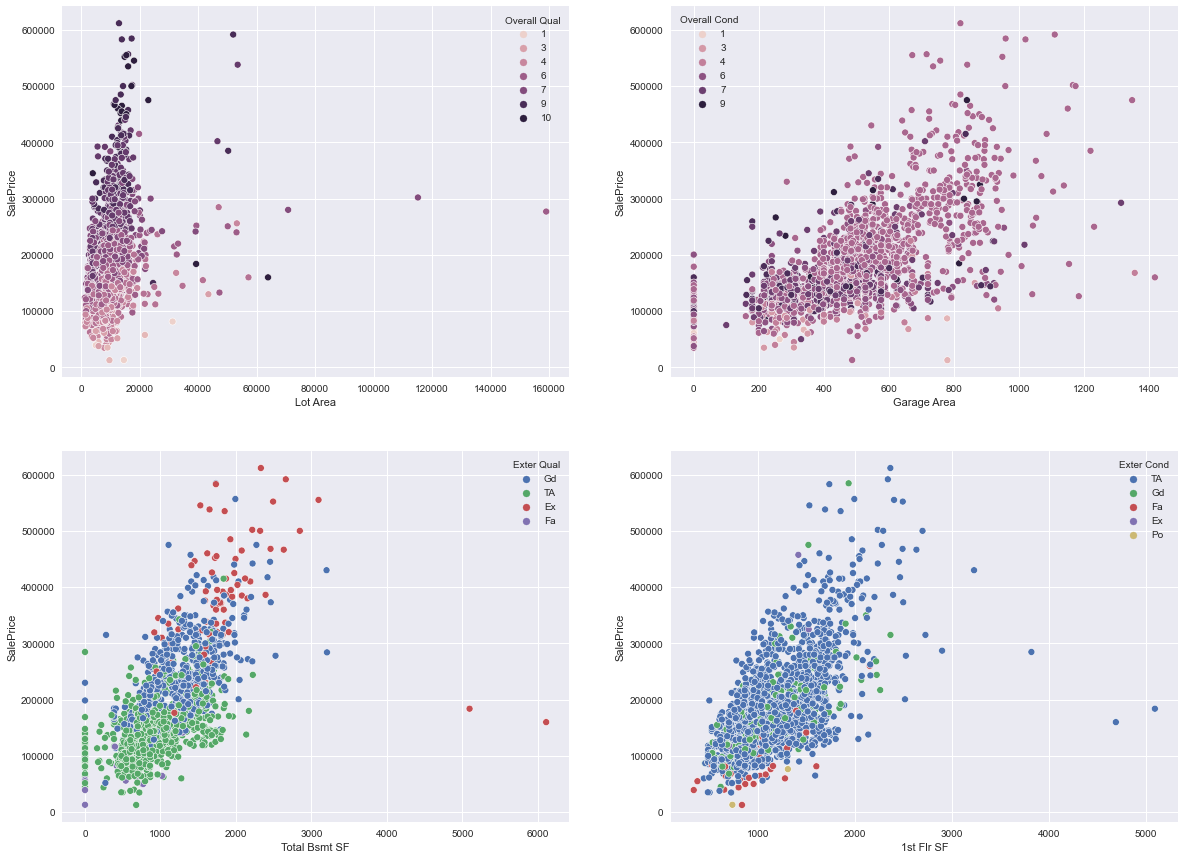

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
sns.scatterplot(data=ames_train, x='Lot Area', y='SalePrice', hue='Overall Qual', ax=ax[0][0]) # outliers over 100000
sns.scatterplot(data=ames_train, x='Garage Area', y='SalePrice', hue='Overall Cond', ax=ax[0][1]) # no outliers
sns.scatterplot(data=ames_train, x='Total Bsmt SF', y='SalePrice', hue='Exter Qual', ax=ax[1][0]) # outliers over 5000
sns.scatterplot(data=ames_train, x='1st Flr SF', y='SalePrice', hue='Exter Cond', ax=ax[1][1]); # outliers over 3500

There are outliers in several categories (based on the scatter plots). These are eligible to be dropped later to improve model performance.

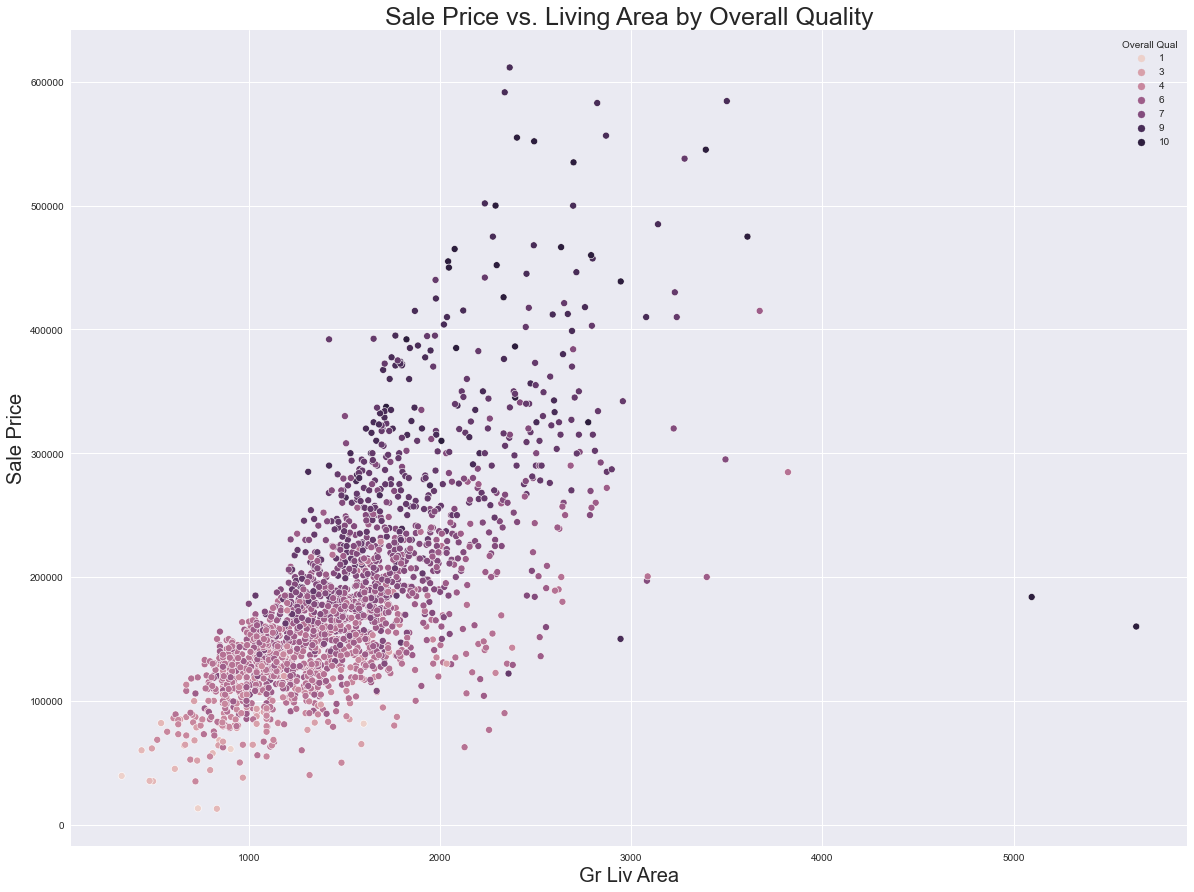

In [29]:
plt.style.use('seaborn')
sns.fig, ax = plt.subplots(1, 1,figsize=(20, 15))
ax.set_ylabel('Sale Price', fontdict={'fontsize': 20})
ax.set_xlabel('Gr Liv Area', fontdict={'fontsize': 20})
ax.set_title('Sale Price vs. Living Area by Overall Quality', fontdict={'fontsize': 25})
sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', ax=ax);

**Living Area and Overall/Exterior Quality & Condition Scatterplots**: Here I tried to see if there was any significant difference between how Qual or Cond variables might signify another intersection. 

Overall Qual, Exter Qual, and Gr. Living Area had clear strong correlations. These variables will likely be important, and might warrant their own combination of features. 

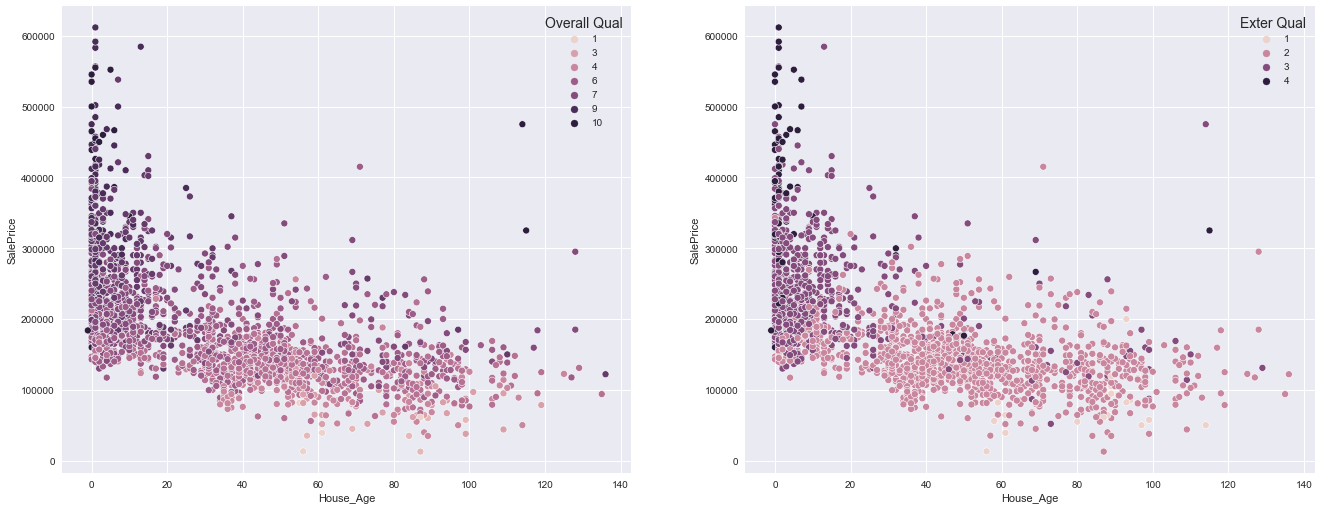

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.scatterplot(data=ames_train, x='House_Age', y='SalePrice', hue='Overall Qual', ax=ax[0])
sns.scatterplot(data=ames_train, x='House_Age', y='SalePrice', hue='Exter Qual', ax=ax[1]); 

**House Age and Sale Price by Overall/Exter Qual**: We see that much older houses typically sell for less and tend to be of middling or lower quality. However, the fact that a small handful 

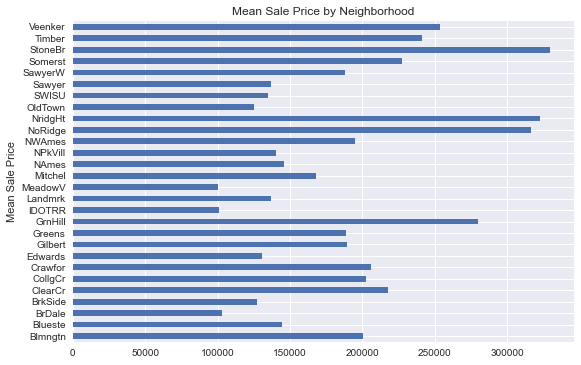

In [106]:
ames_train.groupby(['Neighborhood'])['SalePrice'].mean().plot(kind='barh', title='Mean Sale Price by Neighborhood', xlabel='Mean Sale Price');
#sns.barplot(data=ames_train, x=mean_sp, y='Neighborhood')

***Neighborhood Barchart:*** 
We see significant differences in average SalePrice between neighborhoods. Location will clearly be an important factor.

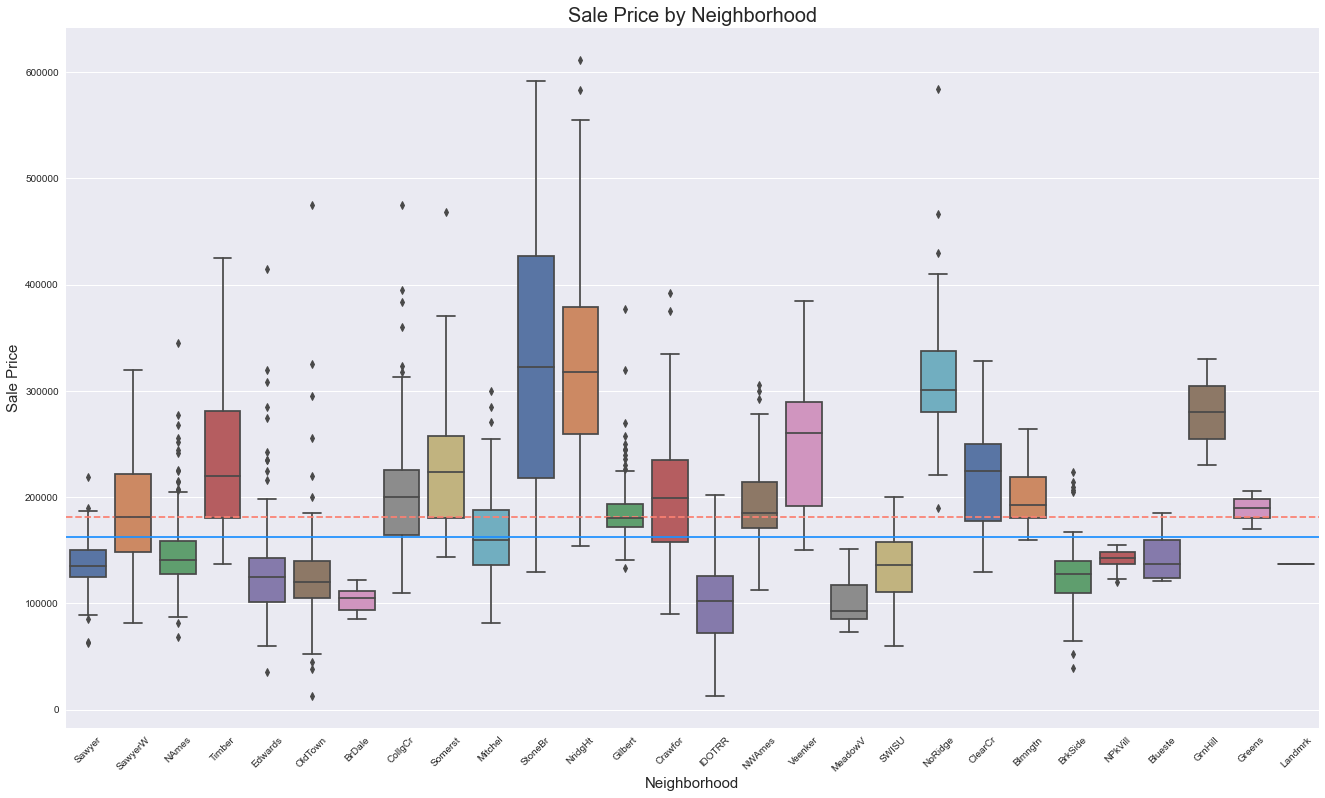

In [84]:
#boxplots of saleprice by neighborhood
# https://moonbooks.org/Articles/How-to-plot-horizontal-lines-with-matplotlib-/#dashed-lines
fig, ax = plt.subplots(figsize=(20, 12))
sns.boxplot(data = ames_train, x='Neighborhood', y='SalePrice', ax=ax, palette='deep')
plt.title('Sale Price by Neighborhood', fontdict={'fontsize':20})
plt.ylabel('Sale Price', fontdict={'fontsize':15})
plt.xlabel('Neighborhood', fontdict={'fontsize':15})
plt.xticks(rotation=45)
ax.axhline(y=np.mean(ames_train['SalePrice']),  linestyle="--", color='salmon')
ax.axhline(y=np.median(ames_train['SalePrice']), color='dodgerblue');

**Neighborhood Boxplots:** In this boxplot of SalePrice by neighborhood, we can clearly see that the neighborhood a home is sold in has a clear relationship to its Sale Price, with some selling significantly above the mean and median Sale Price, while other neighborhood's hoomes sell short of both mean and median sale prices. 

Neighborhood will likely be a variable of interest (OHE?) in the modeling phase of this project